## 📖 ⭐ Amazon Bestseller Genre Prediction

Given *data about Amazon's Top 50 best selling books from 2009-2019*, let's try to predict the **genre** of a given book.

We will use a TensorFlow ANN with two inputs to make our predictions.

Data source: https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

### Getting Started 

In [1]:
import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/bestsellers with categories.csv')
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
df['Name'].unique()

array(['10-Day Green Smoothie Cleanse', '11/22/63: A Novel',
       '12 Rules for Life: An Antidote to Chaos',
       '1984 (Signet Classics)',
       '5,000 Awesome Facts (About Everything!) (National Geographic Kids)',
       'A Dance with Dragons (A Song of Ice and Fire)',
       'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons',
       'A Gentleman in Moscow: A Novel',
       'A Higher Loyalty: Truth, Lies, and Leadership',
       'A Man Called Ove: A Novel',
       "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror",
       'A Stolen Life: A Memoir', 'A Wrinkle in Time (Time Quintet)',
       'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment',
       'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns',
       'Adult Coloring Book: Stress Relieving Animal Designs',


In [6]:
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [7]:
def process_name(name):
    name = re.sub(r'\d+', ' ', name)  # removing numbers
    name = name.split()
    name = " ".join([word for word in name if word.lower() not in stop_words])
    return name

In [8]:
names = df['Name'].apply(process_name)

In [9]:
names

0                            -Day Green Smoothie Cleanse
1                                            / / : Novel
2                             Rules Life: Antidote Chaos
3                                      (Signet Classics)
4      , Awesome Facts (About Everything!) (National ...
                             ...                        
545                Wrecking Ball (Diary Wimpy Kid Book )
546    Badass: Stop Doubting Greatness Start Living A...
547    Badass: Stop Doubting Greatness Start Living A...
548    Badass: Stop Doubting Greatness Start Living A...
549    Badass: Stop Doubting Greatness Start Living A...
Name: Name, Length: 550, dtype: object

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(names)

tokenizer.word_index 

{'book': 1,
 'love': 2,
 'edition': 3,
 'life': 4,
 'the': 5,
 'guide': 6,
 'novel': 7,
 'coloring': 8,
 'kids': 9,
 'a': 10,
 'man': 11,
 'american': 12,
 'series': 13,
 'fifty': 14,
 'shades': 15,
 'dog': 16,
 'world': 17,
 'girl': 18,
 'people': 19,
 'cookbook': 20,
 'art': 21,
 'manual': 22,
 'harry': 23,
 'potter': 24,
 'secret': 25,
 'killing': 26,
 'personal': 27,
 'books': 28,
 'kid': 29,
 'th': 30,
 'little': 31,
 'good': 32,
 'recipes': 33,
 'diary': 34,
 'wimpy': 35,
 'hunger': 36,
 'games': 37,
 'change': 38,
 'story': 39,
 'languages': 40,
 'official': 41,
 'day': 42,
 'fire': 43,
 'stop': 44,
 'f': 45,
 'trilogy': 46,
 'one': 47,
 'go': 48,
 'things': 49,
 'publication': 50,
 'psychological': 51,
 'association': 52,
 'lasts': 53,
 'living': 54,
 'great': 55,
 'first': 56,
 'food': 57,
 'eat': 58,
 'weight': 59,
 'grey': 60,
 'new': 61,
 'kitchen': 62,
 'strengthsfinder': 63,
 'study': 64,
 'freedom': 65,
 'game': 66,
 'war': 67,
 'time': 68,
 'like': 69,
 'twilight': 70,


In [11]:
vocab_length = len(tokenizer.word_index) + 1

print("Vocabulary Length: ", vocab_length)

Vocabulary Length:  1117


In [12]:
names = tokenizer.texts_to_sequences(names)
names

[[42, 538, 539, 540],
 [7],
 [304, 4, 541, 542],
 [543, 305],
 [133, 306, 544, 228, 173, 174, 9],
 [80, 134, 10, 545, 307, 43],
 [66, 81, 175, 176, 177, 178, 179, 180, 80, 134],
 [546, 547, 7],
 [548, 549, 135, 229, 102],
 [11, 308, 309, 7],
 [11, 308, 309, 7],
 [550, 310, 311, 312, 551, 55, 552, 67, 313],
 [553, 4, 103],
 [554, 68, 68, 555],
 [556, 69, 557, 314, 69, 11, 558, 559, 314, 2, 560, 561, 315],
 [82, 8, 1, 181, 182, 562, 8, 1, 230, 181, 316, 136, 563, 317],
 [82, 8, 1, 182, 318, 319, 181],
 [82, 8, 1, 182, 318, 317],
 [82, 8, 28, 8, 1, 320, 564, 316, 565, 321, 322, 136, 566],
 [567, 323],
 [324, 325, 183],
 [324, 325, 183],
 [568],
 [12, 326, 231, 569, 326, 327, 328, 570, 310],
 [571, 572],
 [573, 574, 44, 575, 576, 83, 329],
 [577, 19, 578],
 [231, 330, 579, 331],
 [580, 581, 332, 136],
 [582, 583, 584, 182, 585],
 [232, 233, 586, 33, 333, 20],
 [232, 233, 84, 234, 587, 33, 84, 588],
 [235],
 [235],
 [589, 590, 591, 334],
 [17],
 [17],
 [592, 593],
 [594, 595, 5, 70, 137, 1]

In [13]:
max_seq_length = np.max(list(map(lambda name: len(name), names)))

print('Max Sequence Length:', max_seq_length)

Max Sequence Length: 16


In [14]:
names = pad_sequences(names, maxlen=max_seq_length, padding='post')

In [15]:
names

array([[ 42, 538, 539, ...,   0,   0,   0],
       [  7,   0,   0, ...,   0,   0,   0],
       [304,   4, 541, ...,   0,   0,   0],
       ...,
       [225,  44, 226, ...,   0,   0,   0],
       [225,  44, 226, ...,   0,   0,   0],
       [225,  44, 226, ...,   0,   0,   0]], dtype=int32)

In [16]:
df = df.drop('Name', axis=1)

#### Encoding Other Features

In [17]:
df

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,Non Fiction
1,Stephen King,4.6,2052,22,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,George Orwell,4.7,21424,6,2017,Fiction
4,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,Fiction
546,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [18]:
genre_mapping = {'Non Fiction': 0, 'Fiction': 1}

df['Genre'] = df['Genre'].replace(genre_mapping)

C:\Users\dukea_6wbfoy1\AppData\Local\Temp\ipykernel_7868\4162683150.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace(genre_mapping)


In [19]:
df

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,0
1,Stephen King,4.6,2052,22,2011,1
2,Jordan B. Peterson,4.7,18979,15,2018,0
3,George Orwell,4.7,21424,6,2017,1
4,National Geographic Kids,4.8,7665,12,2019,0
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,1
546,Jen Sincero,4.7,14331,8,2016,0
547,Jen Sincero,4.7,14331,8,2017,0
548,Jen Sincero,4.7,14331,8,2018,0


In [20]:
print("Number of unique authors:", len(df['Author'].unique()))

Number of unique authors: 248


In [21]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [22]:
df = onehot_encode(df, 'Author', 'auth')
df

,User Rating,Reviews,Price,Year,Genre,auth_Abraham Verghese,auth_Adam Gasiewski,auth_Adam Mansbach,auth_Adir Levy,auth_Admiral William H. McRaven,...,auth_Todd Burpo,auth_Tony Hsieh,auth_Tucker Carlson,auth_Veronica Roth,auth_W. Cleon Skousen,auth_Walter Isaacson,auth_William Davis,auth_William P. Young,auth_Wizards RPG Team,auth_Zhi Gang Sha
0,4.7,17350,8,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.6,2052,22,2011,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,18979,15,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.7,21424,6,2017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.8,7665,12,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,4.9,9413,8,2019,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,4.7,14331,8,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,4.7,14331,8,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,4.7,14331,8,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting/Scaling

In [23]:
y = df['Genre'].copy()
X = df.drop('Genre', axis=1).copy()

In [24]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [25]:
X

,User Rating,Reviews,Price,Year,auth_Abraham Verghese,auth_Adam Gasiewski,auth_Adam Mansbach,auth_Adir Levy,auth_Admiral William H. McRaven,auth_Adult Coloring Book Designs,...,auth_Todd Burpo,auth_Tony Hsieh,auth_Tucker Carlson,auth_Veronica Roth,auth_W. Cleon Skousen,auth_Walter Isaacson,auth_William Davis,auth_William P. Young,auth_Wizards RPG Team,auth_Zhi Gang Sha
0,0.359990,0.460453,-0.470810,0.632456,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
1,-0.080978,-0.844786,0.821609,-0.948683,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
2,0.359990,0.599440,0.175400,1.264911,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
3,0.359990,0.808050,-0.655441,0.948683,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
4,0.800958,-0.365880,-0.101547,1.581139,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.241926,-0.216739,-0.470810,1.581139,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
546,0.359990,0.202869,-0.470810,0.632456,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
547,0.359990,0.202869,-0.470810,0.948683,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
548,0.359990,0.202869,-0.470810,1.264911,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412


In [26]:
names_train, names_test, X_train, X_test, y_train, y_test = train_test_split(names, X, y, train_size=0.7, random_state=100)

In [27]:
len(names_train), len(X_train), len(X_test)

(385, 385, 165)

### Modeling/Training

In [28]:
names.shape

(550, 16)

In [29]:
X.shape

(550, 252)

(None, 16, 64)
(None, 1024)


C:\Users\dukea_6wbfoy1\.conda\envs\tfenv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ name_input (InputLayer)       │ (None, 16)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 252)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ name_embedding (Embedding)    │ (None, 16, 64)            │          71,488 │ name_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_dense_1 (Dense)         │ (None, 256)               │          64,768 │ other_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ name_flatten (Flatten)        │ (None, 1024)              │               0 │ name_embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_dense_2 (Dense)         │ (None, 256)               │          65,792 │ other_dense_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 1280)              │               0 │ name_flatten[0][0],        │
│                               │                           │                 │ other_dense_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ outputs (Dense)               │ (None, 1)                 │           1,281 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 203,329 (794.25 KB)

 Trainable params: 203,329 (794.25 KB)

 Non-trainable params: 0 (0.00 B)

None


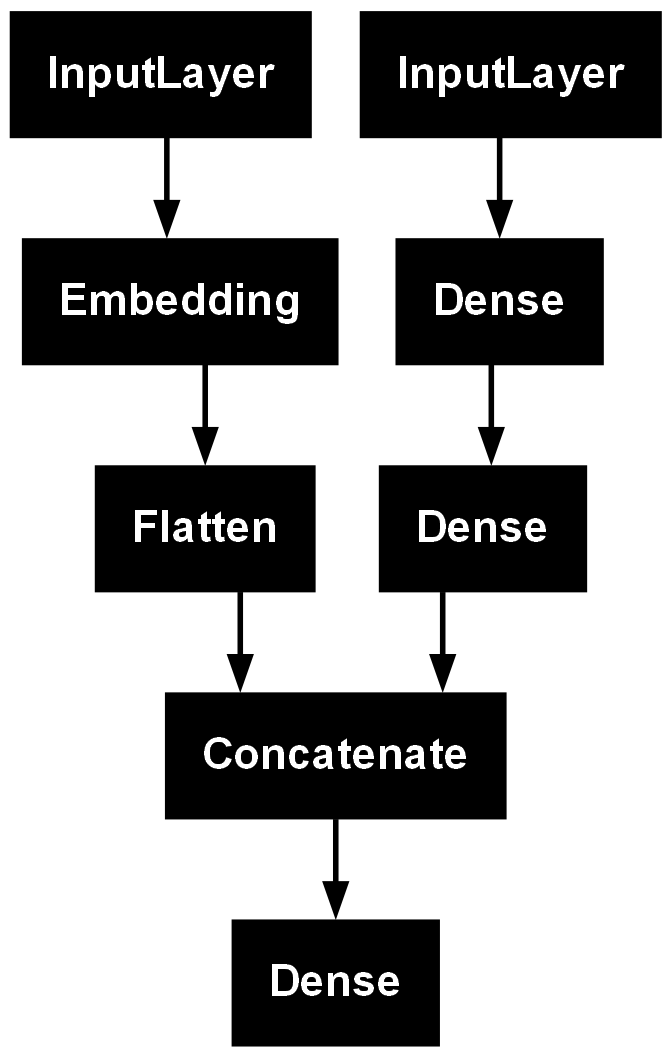

In [30]:
embedding_dim = 64

# Name features
name_input = tf.keras.Input(shape=(16, ), name='name_input')

embedding = tf.keras.layers.Embedding(
    input_dim = vocab_length,
    output_dim = embedding_dim,
    input_length = max_seq_length,
    name = 'name_embedding'
)(name_input)

name_flatten = tf.keras.layers.Flatten(name="name_flatten")(embedding)

print(embedding.shape)
print(name_flatten.shape)

# Other features
other_input = tf.keras.Input(shape=(252, ), name='other_input')

hidden_1 = tf.keras.layers.Dense(256, activation='relu', name='other_dense_1')(other_input)
hidden_2 = tf.keras.layers.Dense(256, activation='relu', name='other_dense_2')(hidden_1)

# Concatenate and output
concat = tf.keras.layers.concatenate([name_flatten, hidden_2], name='concatenate')

outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(concat)

model = tf.keras.Model(inputs=[name_input, other_input], outputs=outputs)

print(model.summary())

tf.keras.utils.plot_model(model)

In [31]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 32
epochs = 100

history = model.fit(
    [names_train, X_train],
    y_train,
    validation_split = 0.12,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5976 - auc: 0.7103 - loss: 0.6475 - val_accuracy: 0.7660 - val_auc: 0.8468 - val_loss: 0.6029
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9645 - auc: 0.9869 - loss: 0.4323 - val_accuracy: 0.8511 - val_auc: 0.8947 - val_loss: 0.4830
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9882 - auc: 0.9995 - loss: 0.2410 - val_accuracy: 0.8511 - val_auc: 0.9023 - val_loss: 0.4066
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9970 - auc: 1.0000 - loss: 0.0981 - val_accuracy: 0.8511 - val_auc: 0.9126 - val_loss: 0.3476
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0306 - val_accuracy: 0.8511 - val_auc: 0.9248 - val_loss: 0.3500
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0109 - val_accuracy: 0.8723 - val_auc: 0.9286 - val_loss: 0.3628
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

### Results

In [32]:
model.evaluate([names_test, X_test], y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8606 - auc: 0.9384 - loss: 0.2976


[0.2975626289844513, 0.8606060743331909, 0.9384475350379944]